# Task_RP

## Task description

Each variant includes one task on the statistical characteristics of a random signal and one task on power spectral density estimation.

Variant 6:
- Compare the sample autocorrelation and autocovariance functions of white Gaussian noise.
- Estimate the PSD using FFT and compare it with the analytical PSD for white noise.

## Python code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Parameters
N = 10000        # Number of samples
fs = 1000        # Sampling frequency (Hz)
variance = 1     # Variance of white noise
mean_val = 0     # Mean of white noise

# Generate white Gaussian noise
np.random.seed(0)  # For reproducibility
signal = np.random.normal(loc=mean_val, scale=np.sqrt(variance), size=N)


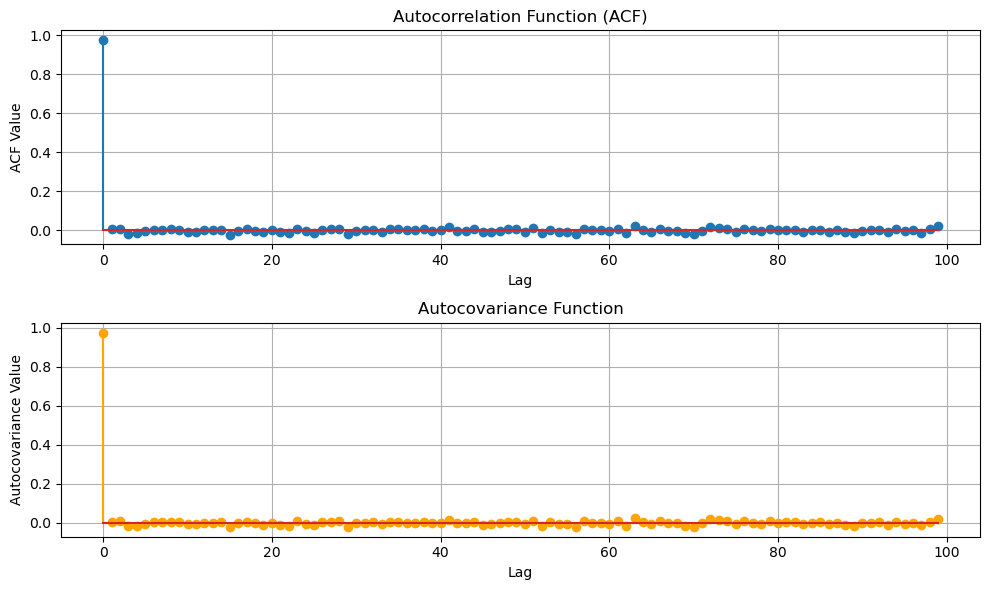

In [5]:
# Part A: Autocorrelation vs. Autocovariance ---------------------------

# Center the signal (remove mean) for autocovariance
signal_centered = signal - np.mean(signal)

# Compute autocorrelation (uncentered)
autocorr = np.correlate(signal, signal, mode='full') / N
autocorr = autocorr[autocorr.size // 2:]  # Keep non-negative lags

# Compute autocovariance (centered)
autocov = np.correlate(signal_centered, signal_centered, mode='full') / N
autocov = autocov[autocov.size // 2:]     # Keep non-negative lags

# Plot comparison
lags = np.arange(len(autocorr))
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.stem(lags[:100], autocorr[:100])
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lag")
plt.ylabel("ACF Value")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(lags[:100], autocov[:100], linefmt='orange')
plt.title("Autocovariance Function")
plt.xlabel("Lag")
plt.ylabel("Autocovariance Value")
plt.grid(True)
plt.tight_layout()
plt.show()


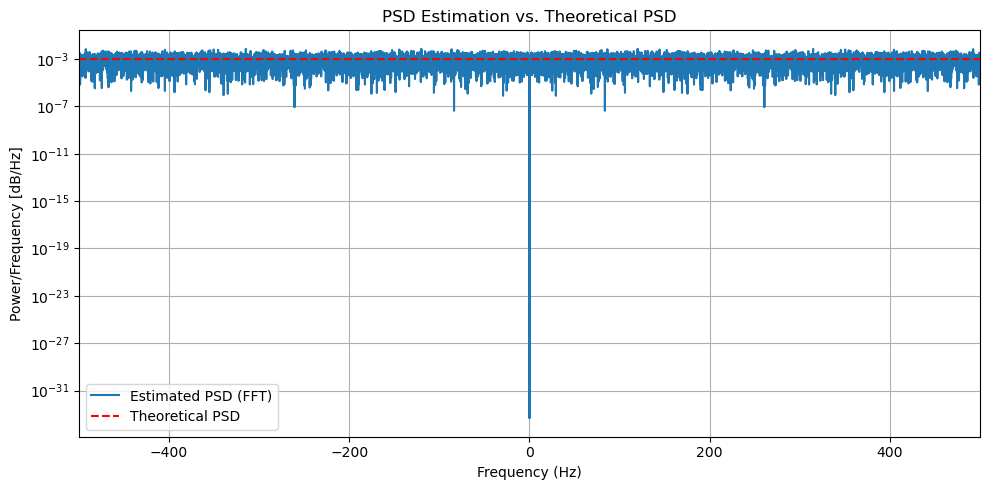

In [3]:
# Part B: PSD Estimation vs. Theoretical PSD ---------------------------

# Estimate PSD using FFT (Periodogram)
f_est, Pxx_est = periodogram(signal, fs=fs, scaling='density', return_onesided=False)

# Theoretical PSD (constant for all frequencies)
Pxx_theoretical = variance / fs * np.ones_like(f_est)  # S(f) = σ² / fs

# Shift frequencies to center at 0 for plotting
f_shifted = np.fft.fftshift(f_est)
Pxx_est_shifted = np.fft.fftshift(Pxx_est)
Pxx_theoretical_shifted = np.fft.fftshift(Pxx_theoretical)

# Plot PSD comparison
plt.figure(figsize=(10, 5))
plt.semilogy(f_shifted, Pxx_est_shifted, label='Estimated PSD (FFT)')
plt.semilogy(f_shifted, Pxx_theoretical_shifted, 'r--', label='Theoretical PSD')
plt.title("PSD Estimation vs. Theoretical PSD")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency [dB/Hz]")
plt.legend()
plt.grid(True)
plt.xlim(-fs/2, fs/2)
plt.tight_layout()
plt.show()